### Data Science Problem Statement
Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

Data Loading and Cleaning

In [4]:
url = "https://raw.githubusercontent.com/commit-live-students/Bootcamp_Problem_Statement/master/data/new_train2.csv"
df = pd.read_csv(url)
print('Shape of the data is: ',df.shape)

df.head()


Shape of the data is:  (32950, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


Identifying Numerical Features

In [6]:
numeric_data = df.select_dtypes(include=np.number)
numeric_col = numeric_data.columns                 

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  duration  campaign
0   49       227         4
1   37       202         2
2   55       550         1
3   36       120         2
4   55       368         2


Identifying Categorical Features

In [7]:
categorical_data = df.select_dtypes(exclude=np.number)
categorical_col  = categorical_data.columns

print("Categorical Features")
print(categorical_data.head())
print("===="*20)

Categorical Features
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


In [8]:
print(df.dtypes) 

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
poutcome       object
y              object
dtype: object


### Check for Class Imbalance

In [9]:
# Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training dataset.
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
print(class_values)

no     88.734446
yes    11.265554
Name: y, dtype: float64


Univariate analysis of Categorical columns

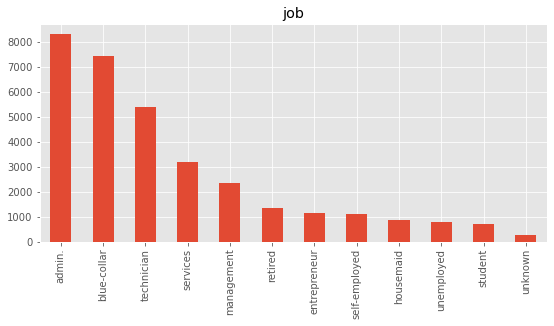

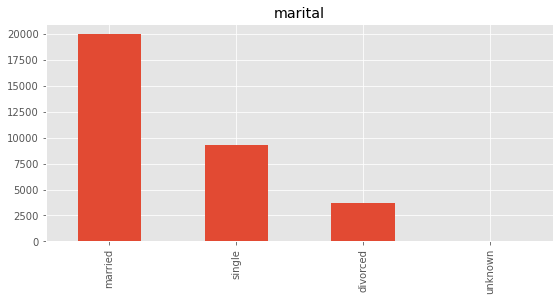

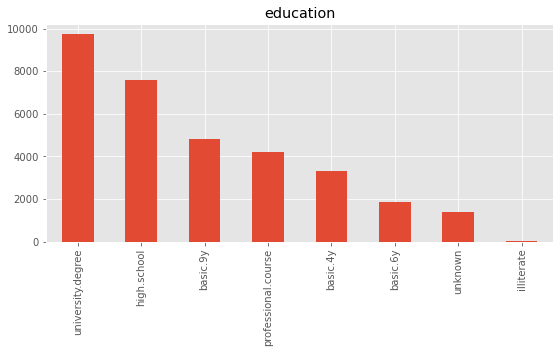

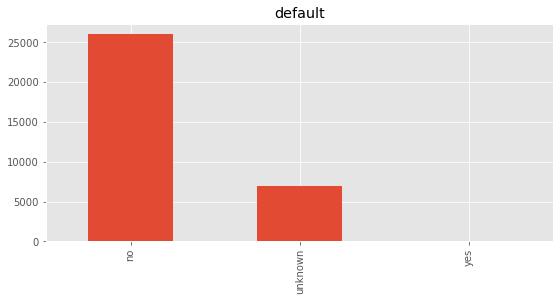

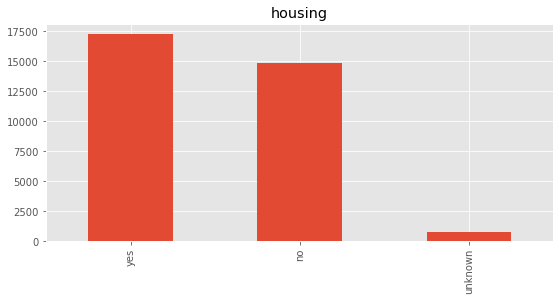

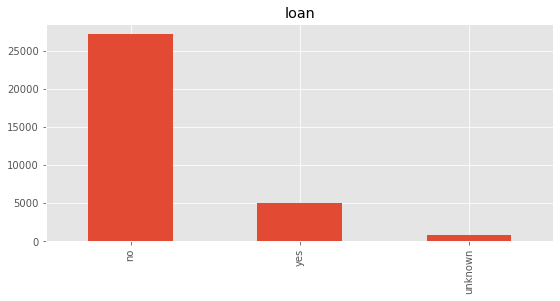

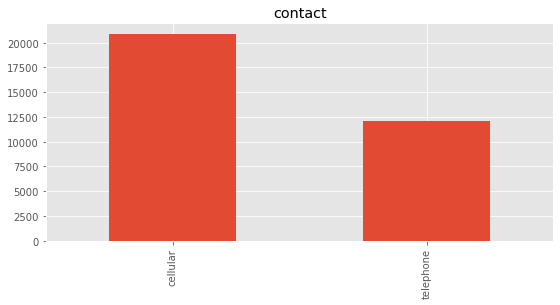

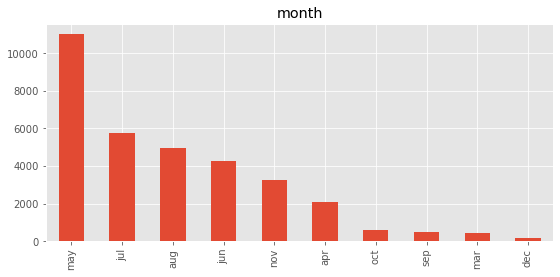

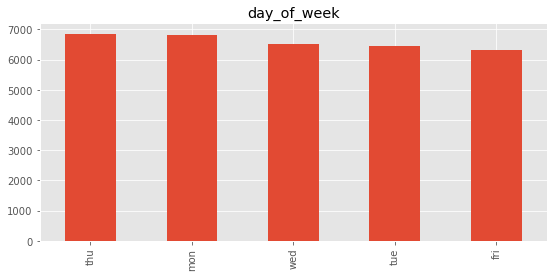

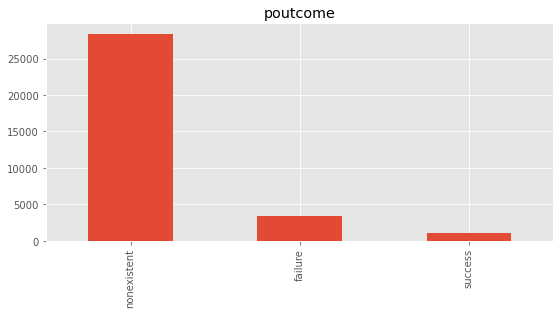

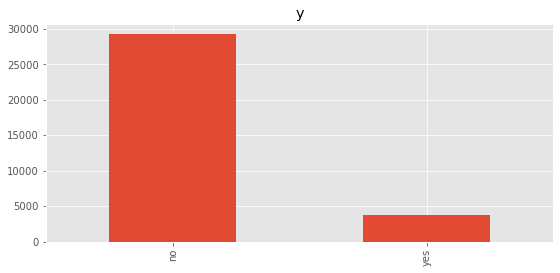

In [10]:
#Univariate analysis is the analysis of one (“uni”) variable. Bivariate analysis is the analysis of exactly two variables.
#This code will plot the frequency of all the values in categorical values.
categorical_col = df.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121) # top and bottom left
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

Some categorical variables have a value called unknown. Unknown values are a kind of missing data. Depending on the use case, we can decide how to deal with these values. One method is to directly impute them with the mode value of respective columns.

In [11]:
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = df[column].mode()[0]     #returns the single value in the series.
    df[column] = df[column].replace('unknown',mode)

Univariate analysis of Continuous column

The code below plots a histogram of all the continuous features and other that plots a boxplot of the same. 

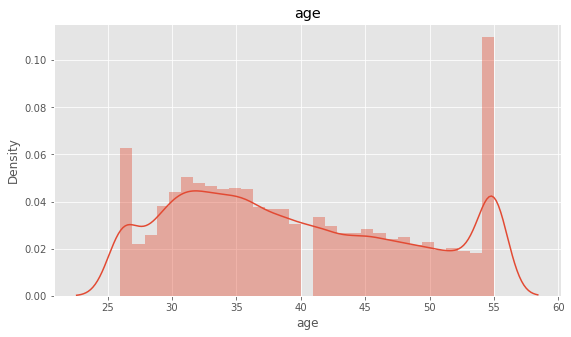

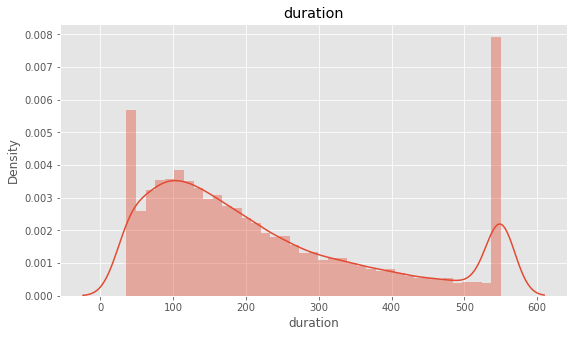

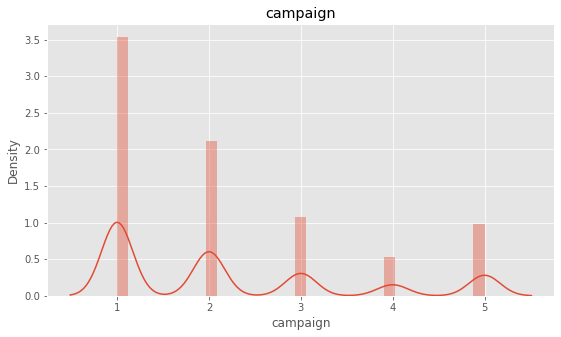

In [12]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)

Bivariate Analysis - Categorical Columns

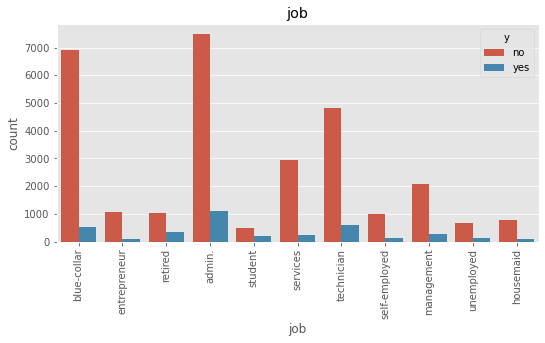

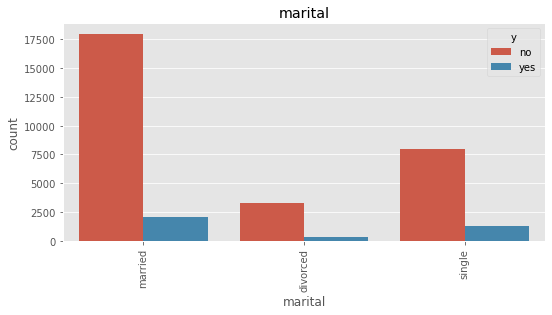

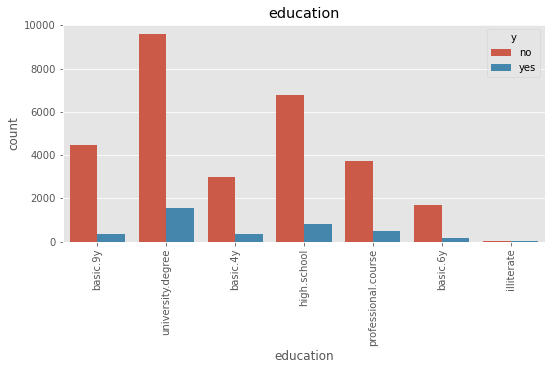

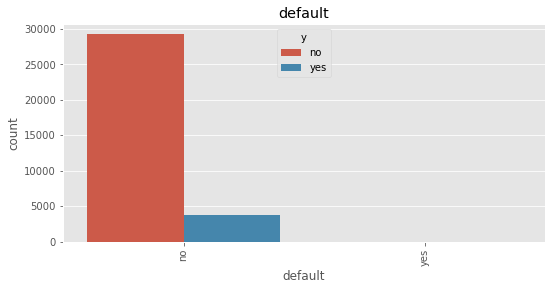

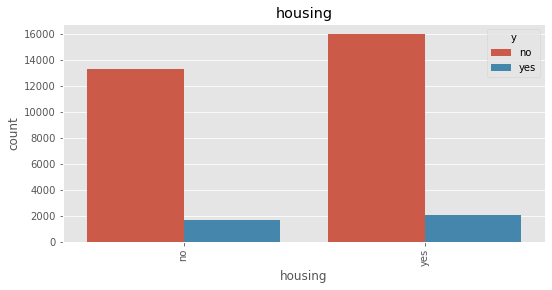

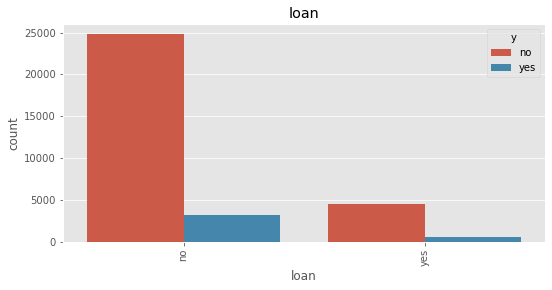

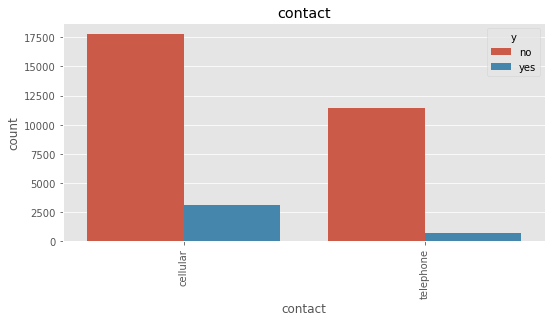

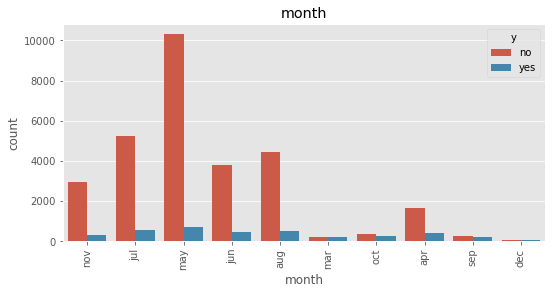

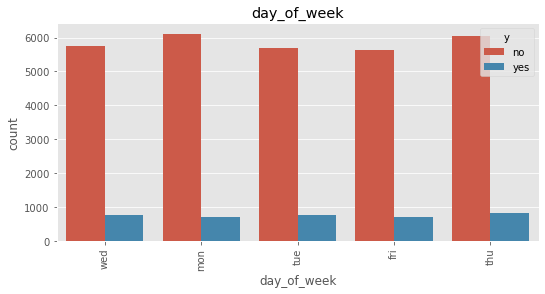

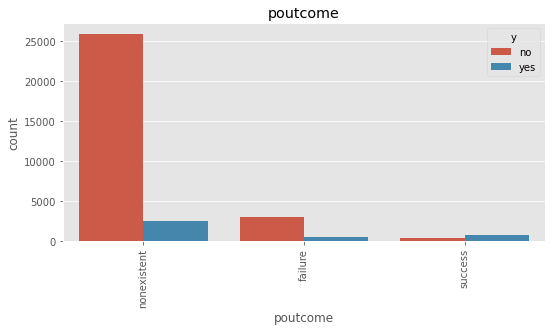

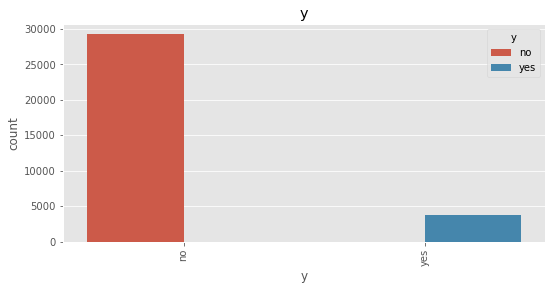

In [14]:
for column in categorical_col:
    plt.figure(figsize=(19,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['y'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:

Label Encoding - Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering. ordinal (like Jr. kg, Sr. kg, Primary school, high school), high memory consumption

One-Hot Encoding.A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. (not ordinal - For categorical variables where no ordinal relationship exists)

### In the code below we will perform label encoding on all the categorical features and also the target (since it is categorical) in the dataset

In [15]:
# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding '+feature)

In [16]:
print(df[feature])

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32950, dtype: int32


In [17]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,1,0


In [18]:
oe = OneHotEncoder()
for feature in categorical_col:
    try:
        df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding '+feature)

<IPython.core.display.Javascript object>

In [19]:
print(df[feature])

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32950, dtype: int64


In [20]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,1,0


Loading Data Modelling Libraries

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms.

There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-

- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier

In [23]:
# Predictors
X = df.iloc[:,:-1]
#.iloc - index location (focus on both rows and columns)

# Target
y = df.iloc[:,-1]
#df.iloc[:, -1] it means the last column
## selecting rows from 1 to 4 and columns from 2 to 4
#display(data.iloc[1 : 5, 2 : 5])


#We aim to take test date as 30% 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)
#If you don't specify the random_state in your code, then every time you run(execute)
#your code a new random value is generated and the train and test datasets would have different values each time.

x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=5)

In [24]:
print(X)

       age  job  marital  education  default  housing  loan  contact  month  \
0       49    1        1          2        0        0     0        0      7   
1       37    2        1          6        0        0     0        1      7   
2       55    5        1          0        0        0     0        0      3   
3       36    0        1          6        0        1     0        1      6   
4       55    5        0          6        0        0     0        0      4   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
32945   28    7        2          3        0        1     0        0      3   
32946   52    9        1          5        0        1     0        0      7   
32947   54    0        1          2        0        0     1        0      3   
32948   29    0        1          6        0        0     0        1      6   
32949   35    0        1          6        0        0     1        1      4   

       day_of_week  duration  campaign  poutcome  


In [25]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train,y_train)
# predicting the values
y_scores = model.predict(x_val)

ROC_AUC_SCORE is 0.5700944040835397


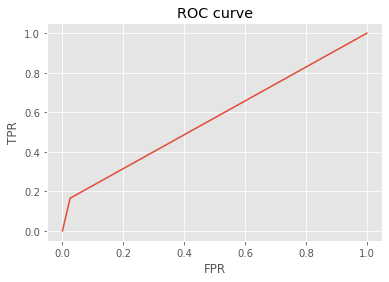

In [26]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6868355017676389


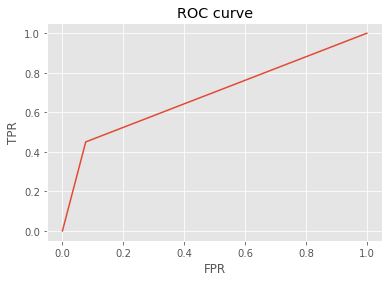

In [27]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
#Fitting a model means that you're making your algorithm 
#learn the relationship between predictors and outcome so that you can predict the future values of the outcome.
y_scores = model.predict(x_val)

auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6581942801691183


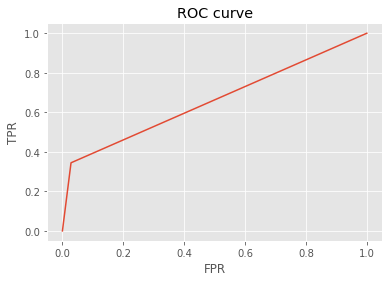

In [28]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### GRID SEARCH & HYPERPARAMETER TUNING

In [29]:
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
#stratify - train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


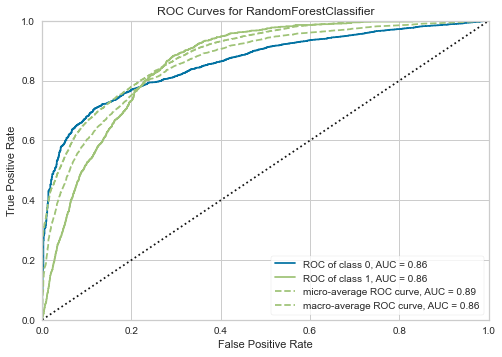

In [30]:
#Fit a random forest model using the best parameters obtained using Grid Search. 
#Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively.

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    # Intializing the Random Forrest Classifier
    rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)
    # Fit the model on data
    rfc.fit(X_sm, y_sm)
    # Get the predictions on the validation data
    y_pred = rfc.predict(x_val)
    # Evaluation of result with the auc_roc graph
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forest_best(X,y)

PREDICTION ON THE TEST DATA

In [31]:
test1 = "https://raw.githubusercontent.com/commit-live-students/Bootcamp_Problem_Statement/master/data/new_test.csv"
test = pd.read_csv(test1)
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [32]:
# Initialize Smote
smote = SMOTE()

# Applying SMOTE
X_sm, y_sm =  smote.fit_resample(x_train, y_train)

# Initialize our Random forrest model with the best parameter values derived
rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)

# Fitting the model
rfc.fit(X_sm,y_sm)

# Predict on the preprocessed test file
y_pred = rfc.predict(test)

# storing the predictions
prediction = pd.DataFrame(y_pred,columns=['y'])

# reading the submission file with client ids
submission1 = "https://raw.githubusercontent.com/commit-live-students/Bootcamp_Problem_Statement/master/data/submission.csv"
submission = pd.read_csv(submission1)

# Concatenate predictions and create our final submission file
final_submission = pd.concat([submission['Id'],prediction['y']],1)

# Results
final_submission.head()

,Id,y
0,14455,0
1,36380,0
2,40076,0
3,10778,0
4,27939,0
